<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


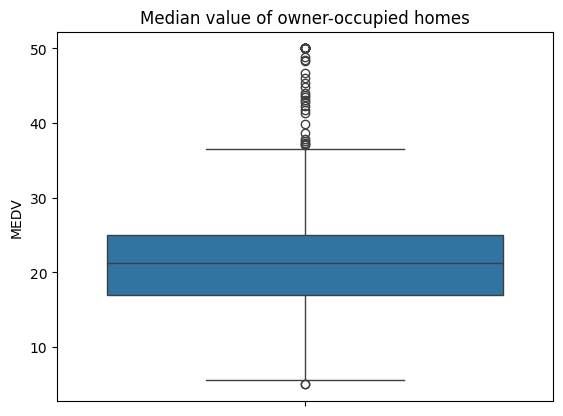

In [5]:
#For the 'Median value of owner-occupied homes' provide a boxplot
ax=sns.boxplot(y='MEDV', data=boston_df,)
pyplot.title('Median value of owner-occupied homes')
pyplot.show()

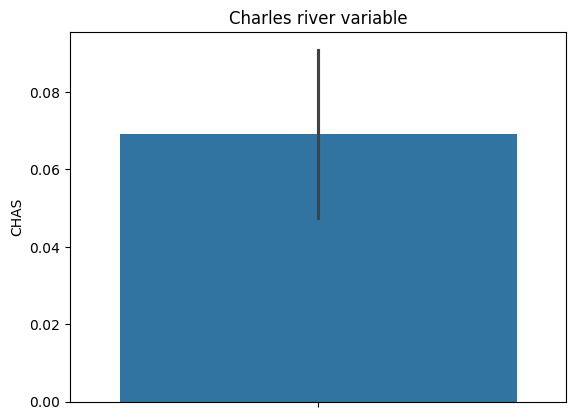

In [6]:
#Provide a bar plot for the Charles river variable
ax=sns.barplot(y='CHAS',data=boston_df)
pyplot.title('Charles river variable')
pyplot.show()

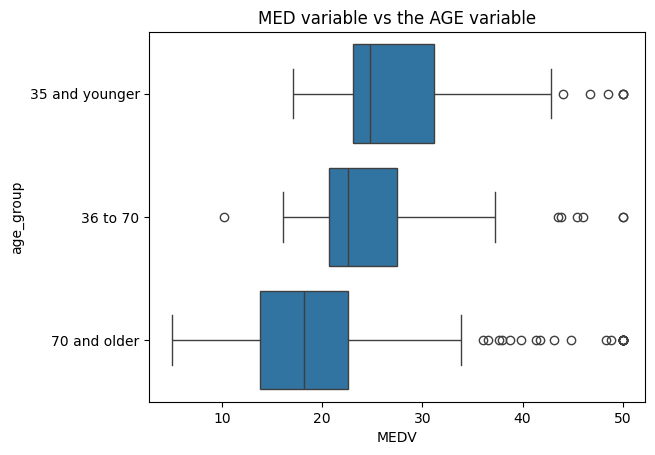

In [7]:
#Provide a boxplot for the MED variable vs the AGE variable

bins=[0,35,70,float('inf')]
labels=['35 and younger','36 to 70', '70 and older']
boston_df['age_group']=pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

ax=sns.boxplot(x='MEDV', y='age_group', data=boston_df)
pyplot.title('MED variable vs the AGE variable')
pyplot.show()

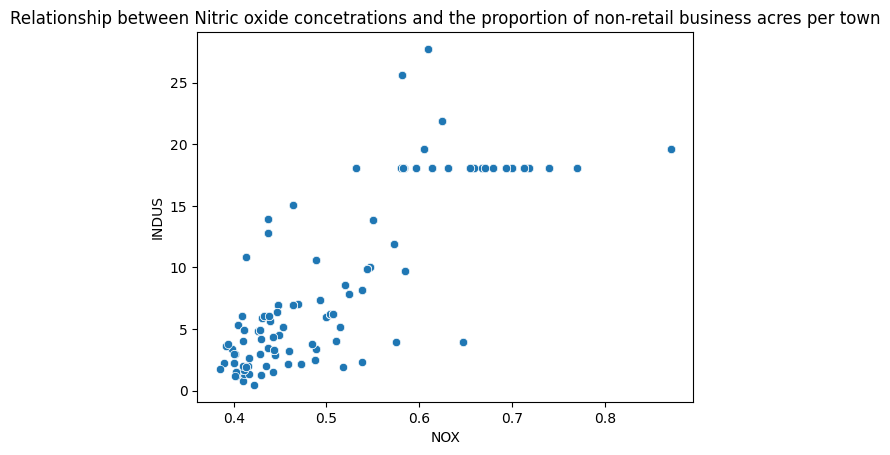

In [8]:
#Provide a scatter plot to show the relationship between Nitric oxide concetrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax=sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Relationship between Nitric oxide concetrations and the proportion of non-retail business acres per town')
pyplot.show()

In [ ]:
#The relationship between Nitric oxide concetrations and the proportion of non-retail business acres per town seems to be strong, possitive linear relationship (relatively strong correlation)

Text(0.5, 1.0, 'Pupil to teacher ratio variable')

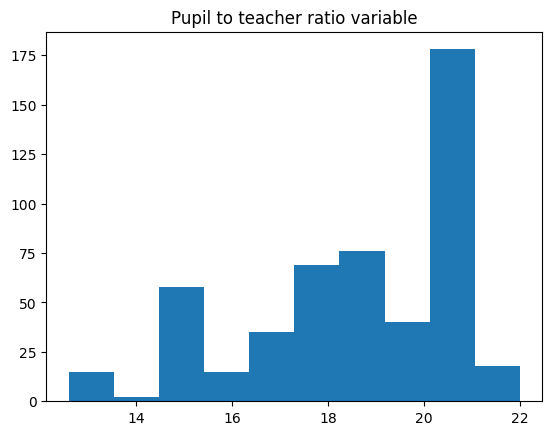

In [9]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Pupil to teacher ratio variable')

In [10]:
#1. Is there a significant difference in median value of houses bounded by the Chalres river or not (T-test for independent samples)

#H0=("there is no significant difference in median value of houses bounded by the Chalres river")
#H1=("there is a significant difference in median value of houses bounded by the Chalres river")

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                      boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [ ]:
#A p-value of 0.0000739 is very small and well below typical significance thresholds - 0.05. This suggests that the difference in median value of houses bounded by the Chalres river is statistically significant. The null hypothesis can be rejected.
#Therefore, there is a significant difference in median value of houses bounded by the Chalres river.

In [11]:
#2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#H0=("there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")
#H1=("there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")

MEDV=boston_df['MEDV']
AGE=boston_df['AGE']

f_statistic, p_value=scipy.stats.f_oneway(MEDV,AGE)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1223.1740271875933, P-Value: 3.20946197250671e-176


In [ ]:
# There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE), so we can reject the null hypothesis.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

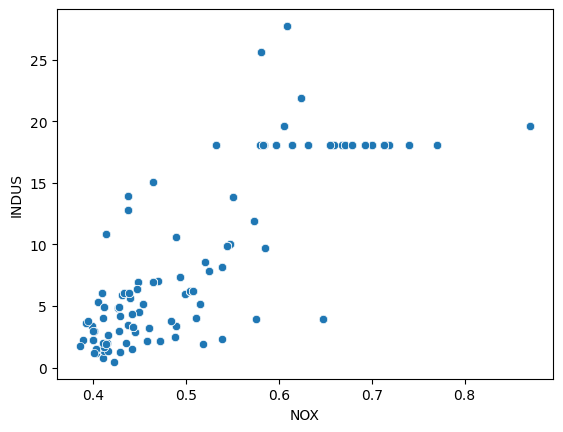

In [12]:
#3. Can we conclude that there is no relationship between Nitric oxide concetrations and proportion of non-retails business acres per town? (Pearson Correlation)

#H0=(there is no relationship between Nitric oxide concetrations and proportion of non-retails business acres per town")
#H1=(there is a relationship between Nitric oxide concetrations and proportion of non-retails business acres per town")

ax=sns.scatterplot(x='NOX', y='INDUS',data=boston_df)
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

In [ ]:
#Since the p-value < 0.05 we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concetrations and proportion of non-retails business acres per town

In [14]:
#4. What is the impact of an (DIS) additional weighted distance to the five Boston employment centres on the (MEDV) median value of owner occupied homes? (Regression analysis)

#H0=(" there is no impact of an (DIS) additional weighted distance to the five Boston employment centres on the (MEDV) median value of owner occupied homes")
#H1=(" there is an impact of an (DIS) additional weighted distance to the five Boston employment centres on the (MEDV) median value of owner occupied homes")

X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        14:27:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#The p-value is very small (essentially 0), which indicates that the overall regression model is statistically significant, meaning that the relationship between DIS and MEDV is unlikely to be due to random chance.